In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import illustris_python.groupcat as gc

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

%matplotlib inline

In [ ]:
basePath = "/Users/forero/Illustris_data/TNG300-1/"

halo_fields = ['GroupFirstSub', 'Group_M_Crit200', 'Group_R_Crit200', 'Group_M_Mean200',
               'GroupNsubs', 'GroupPos', 'GroupVel', 'GroupFirstSub', 'GroupMassType']
halos = gc.loadHalos(basePath,99, fields=halo_fields) # the selection is based on the FOF groups


subhalo_fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloPos', 'SubhaloVmax','SubhaloMassType',
                  'SubhaloVel', 'SubhaloParent', 'SubhaloGrNr', 'SubhaloStellarPhotometrics']
subhalos = gc.loadSubhalos(basePath,99, fields=subhalo_fields)
header = gc.loadHeader(basePath,99)
BoxSize = header['BoxSize']
# Photometric bands are: U, B, V, K, g, r, i, z

In [4]:
stellar_mass_hr = subhalos['SubhaloMassType'][:,4] + 1E-10

In [ ]:
dtype=[('HaloID', 'i8'),('GalID', 'i8'), ('snapform', 'f8'),('zform', 'f8'),('mass', 'f8'),
       ('x', 'f8'),('y', 'f8'),('z', 'f8')]
central_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/Central_Galaxies/Central_Galaxies.dat", dtype=dtype)
all_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/All_Galaxies/ZM_Galaxies3001.dat", dtype=dtype)
sat_data = np.loadtxt("/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/Satellite_Galaxies/SatZ_Galaxies.dat", dtype=dtype)


In [6]:
dtype=[('HaloID', 'i8'),('GalID', 'i8'), ('snapform', 'f8'),('zform', 'f8'),('mass', 'f8'),
       ('x', 'f8'),('y', 'f8'),('z', 'f8')]
gal_formation_hires = np.loadtxt(gal_formation_hires_file, dtype=dtype)
gal_formation_lores = np.loadtxt(gal_formation_lores_file, dtype=dtype)

In [31]:
log_gal_formation_hires_mass = np.log10(gal_formation_hires['mass'])
log_gal_formation_lores_mass = np.log10(gal_formation_lores['mass'])

In [7]:
# plot galaxy mass histogram
mass_delta = 0.2
mass_bins = np.arange(-4.0, 3.0, mass_delta)
center_mass_bins = 0.5*(mass_bins[1:]+mass_bins[:-1])
print(mass_bins)
hist_lr, bins = np.histogram(np.log10(gal_formation_lores['mass']), bins=mass_bins)
hist_hr, bins = np.histogram(np.log10(gal_formation_hires['mass']), bins=mass_bins)
hist_stellar_hr, bins = np.histogram(np.log10(stellar_mass_hr), bins=mass_bins)
hist_stellar_lr, bins = np.histogram(np.log10(stellar_mass_lr), bins=mass_bins)

[-4.00000000e+00 -3.80000000e+00 -3.60000000e+00 -3.40000000e+00
 -3.20000000e+00 -3.00000000e+00 -2.80000000e+00 -2.60000000e+00
 -2.40000000e+00 -2.20000000e+00 -2.00000000e+00 -1.80000000e+00
 -1.60000000e+00 -1.40000000e+00 -1.20000000e+00 -1.00000000e+00
 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01 -2.00000000e-01
  3.55271368e-15  2.00000000e-01  4.00000000e-01  6.00000000e-01
  8.00000000e-01  1.00000000e+00  1.20000000e+00  1.40000000e+00
  1.60000000e+00  1.80000000e+00  2.00000000e+00  2.20000000e+00
  2.40000000e+00  2.60000000e+00  2.80000000e+00]


/Users/forero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


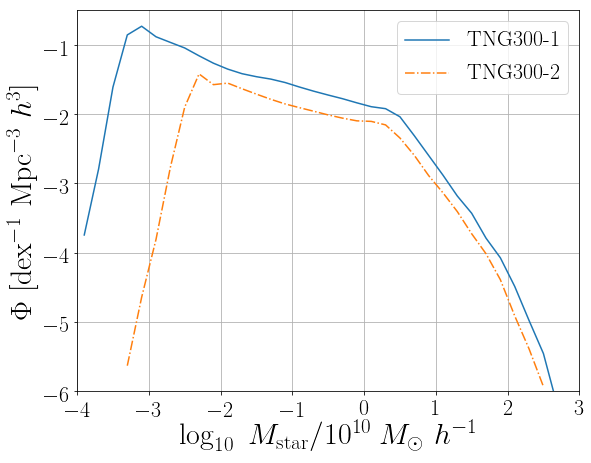

In [23]:
plt.figure(figsize=(9,7))
plt.plot(center_mass_bins, np.log10(hist_stellar_hr/mass_delta/(BoxSize/1000)**3), label='TNG300-1')
plt.plot(center_mass_bins, np.log10(hist_stellar_lr/mass_delta/(BoxSize/1000)**3), '-.', label='TNG300-2')
plt.xticks(np.arange(-4,4,1))
plt.xlabel("$\log_{10}\ M_{\mathrm{star}} / 10^{10}\ M_{\odot}\ h^{-1}$")
plt.ylabel("$\Phi$ [dex$^{-1}$ Mpc$^{-3}$ $h^{3}$]")
plt.legend(fontsize=SMALL_SIZE)
plt.xlim(-4,3)
plt.ylim(-6,-0.5)
plt.grid()

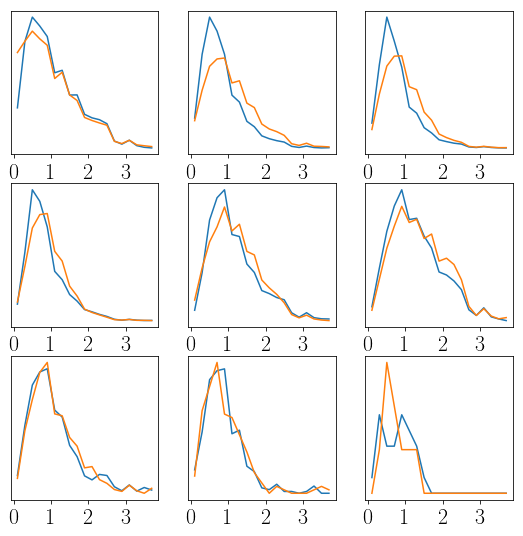

In [64]:
mass_bins = np.arange(-2.0,3.5,0.5)
center_mass_bins = 0.5*(mass_bins[1:]+mass_bins[:-1])

zbin_delta = 0.2
zform_bins = np.arange(0.0, 4.0, zbin_delta)
center_zform_bins = 0.5*(zform_bins[1:]+zform_bins[:-1])

plt.figure(figsize=(9,9))
for i_bin in range(9):

    ii_bin = (log_gal_formation_hires_mass>mass_bins[i_bin]) & (log_gal_formation_hires_mass<mass_bins[i_bin+1])
    tmp_data_hr = gal_formation_hires[ii_bin]

    ii_bin = (log_gal_formation_lores_mass>mass_bins[i_bin]) & (log_gal_formation_lores_mass<mass_bins[i_bin+1])
    tmp_data_lr = gal_formation_lores[ii_bin]

    hist_hr, _ = np.histogram(tmp_data_hr['zform'], bins=zform_bins, density=True)
    hist_lr, _ = np.histogram(tmp_data_lr['zform'], bins=zform_bins, density=True)

    plt.subplot(3,3,i_bin+1)
    plt.plot(center_zform_bins, hist_hr)
    plt.plot(center_zform_bins, hist_lr)
    plt.yticks([])
    plt.xticks(np.arange(0,4,1))
    

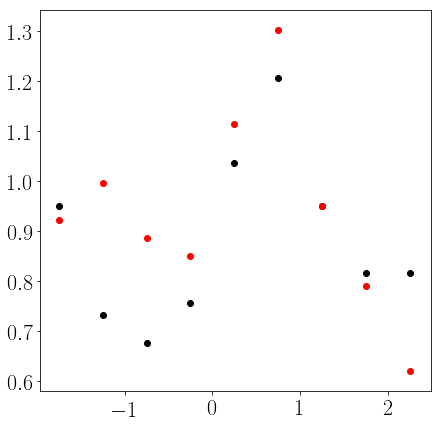

In [72]:
mass_bins = np.arange(-2.0,3.5,0.5)
center_mass_bins = 0.5*(mass_bins[1:]+mass_bins[:-1])

zbin_delta = 0.2
zform_bins = np.arange(0.0, 4.0, zbin_delta)
center_zform_bins = 0.5*(zform_bins[1:]+zform_bins[:-1])

plt.figure(figsize=(7,7))
for i_bin in range(9):

    ii_bin = (log_gal_formation_hires_mass>mass_bins[i_bin]) & (log_gal_formation_hires_mass<mass_bins[i_bin+1])
    tmp_data_hr = gal_formation_hires[ii_bin]

    ii_bin = (log_gal_formation_lores_mass>mass_bins[i_bin]) & (log_gal_formation_lores_mass<mass_bins[i_bin+1])
    tmp_data_lr = gal_formation_lores[ii_bin]

    hist_hr, _ = np.histogram(tmp_data_hr['zform'], bins=zform_bins, density=True)
    hist_lr, _ = np.histogram(tmp_data_lr['zform'], bins=zform_bins, density=True)

    #plt.subplot(3,3,i_bin+1)
    plt.scatter(center_mass_bins[i_bin], np.median(tmp_data_hr['zform']), color='black')
    #plt.errorbar(center_mass_bins[i_bin], np.mean(tmp_data_hr['zform']), yerr=np.std(tmp_data_hr['zform']), color='black')
    plt.scatter(center_mass_bins[i_bin], np.median(tmp_data_lr['zform']), color='red')
    #plt.errorbar(center_mass_bins[i_bin], np.mean(tmp_data_lr['zform']), yerr=np.std(tmp_data_lr['zform']), color='red')
    #plt.plot(center_zform_bins, hist_lr)
    #plt.yticks([])
    #plt.xticks(np.arange(0,4,1))
    